In [25]:
%matplotlib inline
import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

In [36]:
dataroot = 'data/train'

image_size = 256

batch_size = 16

workers = 2


device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [37]:
# Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
#                                transforms.Resize(image_size),
#                                transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ])
                          )

In [38]:
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

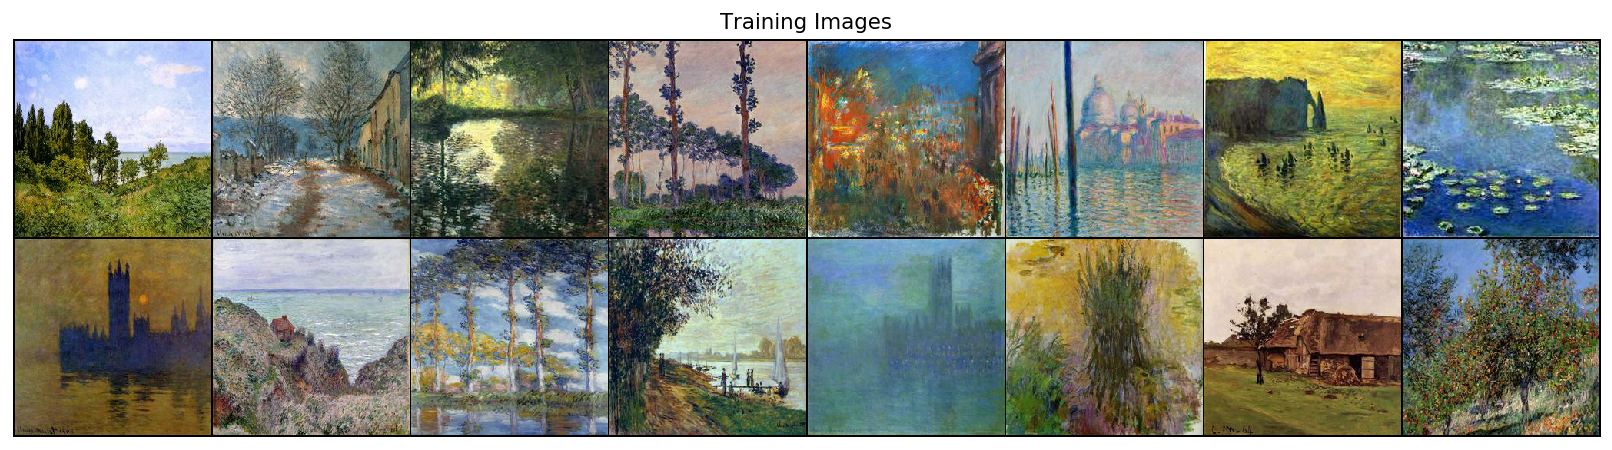

In [41]:
# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(16,16), dpi=128)
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device), padding=2, normalize=True).cpu(),(1,2,0)))